## Weighted Feature

### SVGG 7
* Train on orignal data
* SVBlock (3xConv2D with residual)
* Weighted Feature layer take $2$ inputs, compute GAP -> matmul -> flatten -> fc -> sigmoid -> * 
* SVGG (4xSVBlock)

* Adam 0.001 , L2=1e-3

`/tf/data/Quan/fer2013/backtobasics/svgg7/svgg_resnet`

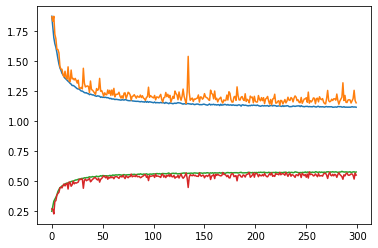

### SVGG 7_4

* Weight Feature layer:
    * cor = x1 matmul x2 -> D x D matrix -> sum(1) -> fc -> bn -> sigmoid -> (1+cor) * x

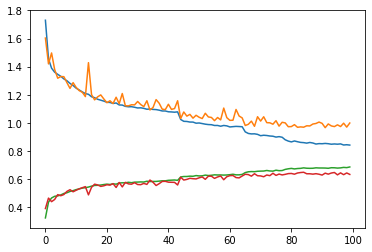

val acc: 0.6485745614035088   
val loss: 0.9692865871546561  
  
test acc: 0.6432
test loss: 0.9448

### SVGG 7_5

* Weight Feature:
    * cor = x1 matmul x2 -> sum(1) -> softmax -> (1+cor) * x

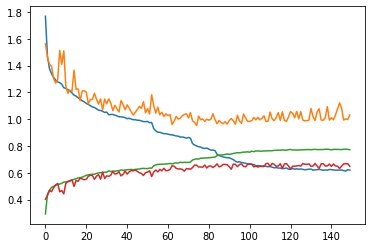

val acc: 0.6697198275862069  
val loss: 1.0019045246058498

Observed minimal val loss: 0.960

test acc: 0.653  
test loss: 1.015

### SVGG 7_6 (Pending)

* Weight Feature layer:
    * 

### SVGG 7_7

* Weighted Feature bottle neck:
    * x1, x2 -> GAP -> fc + bn -> cor = x1.T * x2 -> softmax -> (1 + cor) * x3 (x3 using iconv + bn) -> relu
    
* SVGG 5 blocks with bottle neck 64 -> 16, 128 -> 32, ...

`/tf/data/Quan/fer2013/backtobasics/svgg7/svgg_resnet7_7`

Val acc: 0.653  
Val loss: 0.956

### SVGG 8

* Weighted Feature layer takes $2$ inputs
    * x1 -> GAP -> fc + bn -> sigmoid ->
    * x2 -> iconv + bn -> * with x1 -> + x2 (residual) -> bn
    
`/tf/data/Quan/fer2013/backtobasics/svgg8/svgg_resnet`

*Not improve*

## Attention mechanism

### attention/svgg_resnet (no sigmoid)
*wf0 layer was not added!!!*

* Attention layer takes $3$ inputs corresponding to Q, K, V
    * x1 -> iconv -> flatten(-2)
    * x2 -> iconv -> flatten(-2)
    * x3 -> iconv -> flatten(-2)
    
    * QK = x1 matmul x2.T -> / sqrt(emb_dim)
    * QK * x3 -> reshape -> iconv + bn + residual x2
    
* SVGG
    * Add preconv before in SV Block
    * SVGG takes $4$ SVBlocks
    
* Adam 0.001, L2=1e-4

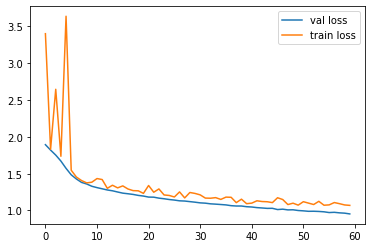


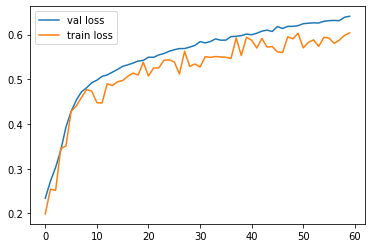

*contine to train until 400 epochs*

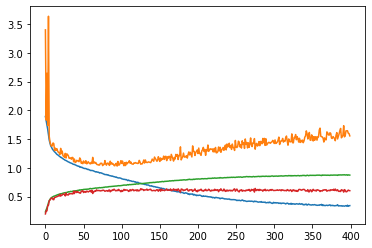

val acc: 0.6419719827586207  
val loss: 1.32493787592855

### Same as above architecture and increase to 5 blocks

*wf0 layer was not added!!!*

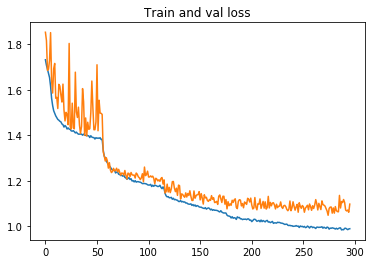

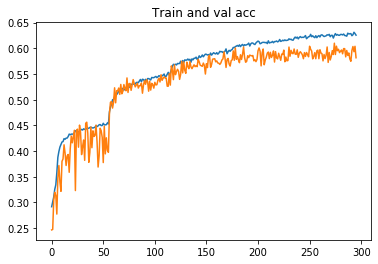


val acc: 0.629  
val loss: 0.978

### SVGG Resnet4: Same as above but correct with adding wf0 layer

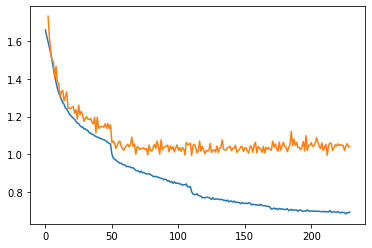

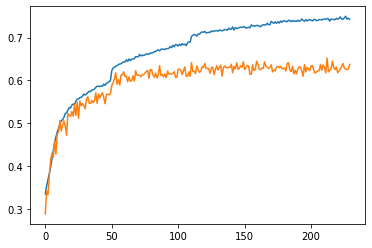

val acc: 0.6522090517241379  
val loss: 0.994035456714959

### SGG 4_2

* Attention layer is the same except adding sigmoid after iconv for x1 and x2
* SVGG 5 blocks

* SGD 0.008, reduce by 2 every 30 epochs

`/tf/data/Quan/fer2013/backtobasics/attention/svgg_resnet4_2`

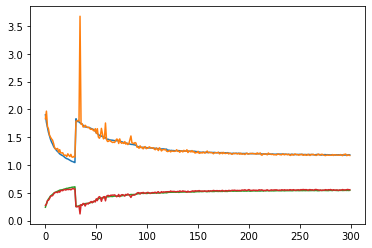

val accuracy: 0.5767543859649122  
val loss: 1.13971353622905

test accuracy: 0.634
test loss: 1.016

### SVGG Resnet 5

* Weighted Feature layer: apply Sigmoid after QK
* SVBlock and SVGG are the same as above

* SGD 0.008, L2=1e-4
* Reduce lr / 5 every 60 epochs

`/tf/data/Quan/fer2013/backtobasics/attention/svgg_resnet5`

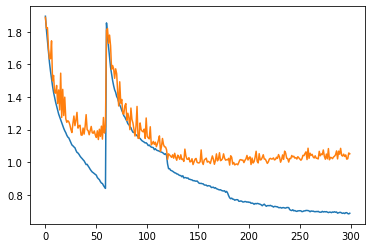

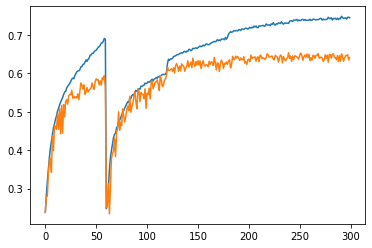

val acc: 0.6540948275862069  
val loss: 1.0007134449893031

### SVGG Resnet 5_2

* The same architecture

* Adam 0.01, L2=1e-4
* Reduce lr / 10 every 40 epochs

`/tf/data/Quan/fer2013/backtobasics/attention/svgg_resnet5_2`

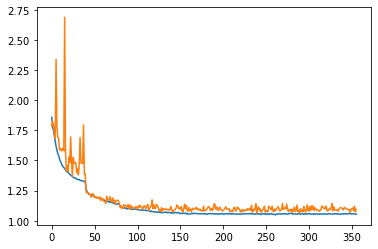

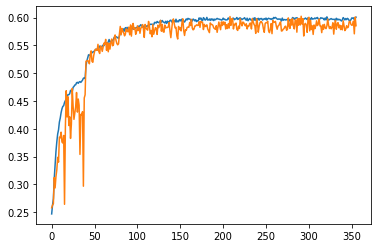

val acc: 0.6023706896551724  
val loss: 1.0745561657280758

### SVGG Resnet6

* The same architecture
* SVGG block reduce to 4 blocks, take addition outputs from x2 and x3 from (SVblock 2 and 3, respectively)

* Adam 0.008, L2=1e-4
* Reduce lr / 5 every 60 epochs

`/tf/data/Quan/fer2013/backtobasics/attention/svgg_resnet6`

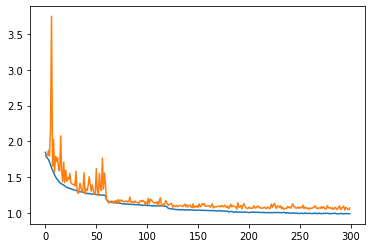

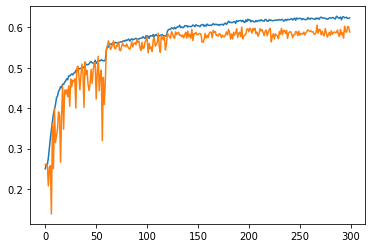

val acc: 0.6058728448275862  
val loss: 1.059031172045346

**All above results were taken from [svgg2_cont](http://113.161.34.240:19012/notebooks/Quan/fer/v2_backtobasics/svgg2_cont.ipynb). Dataset is original, including noise**

## Inception concept in Weighted Feature

We take the inception concept into account. Indeed, we use 3 different Linear + BatchNorm for the input and concatenate them at the output. We do not use * but + directly with residual.

Comparing with the normal mode (without Weighted Feature layers)

Here is the comparison

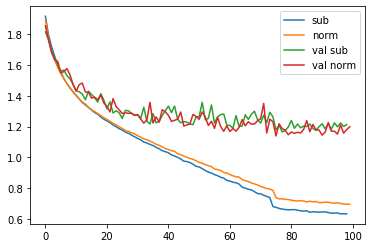

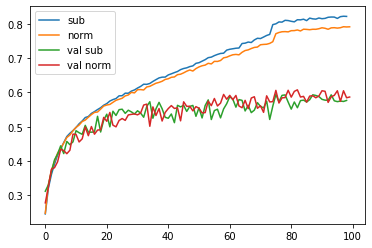

**The results were taken from [Untitled](http://113.161.34.240:19012/notebooks/Quan/fer/v2_backtobasics/Untitled.ipynb). Dataset is the denoised version**

## SVGG with cleaned data

### SVGG 4

* Attention:
    * Single iconv (without BN or ReLU) for each x1, x2, x3
    * Normalize QK by its mean and std
    * QK matmul x3

* SVGG 5 SVBlocks, additional shortcut output from x3 and x4, cat

* SGD 0.008, L2=1e-4, reduce by 5 every 300 epochs

`/tf/data/Quan/fer2013/backtobasics_cleaned_data/attention/svgg_resnet4`

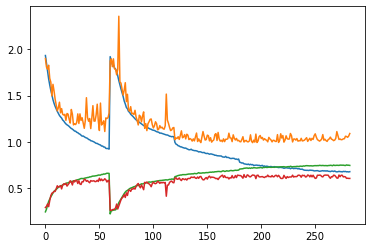

val acc: 0.6468211206896551  
val loss: 0.9987077980205931

### Attention inside SVBlock (resnet50)

* SVGG 5 blocks: 64, 128, 256, 512, 512
* SGD 0.008, L2=1e-4

`/tf/data/Quan/fer2013/backtobasics_cleaned_data/attention/resnet50`

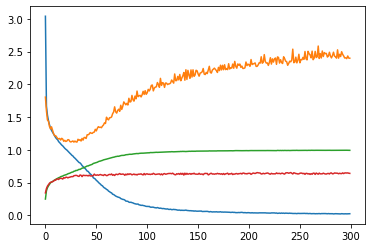

val acc: 0.6524122807017544  
val loss: 2.3445570908094706

### SVGG 5_3 (*)

* Attention
    * Single iconv for x1, x2, x3
    * QK is normalized by sqrt(HW) x sqrt(emb_dim)
    * x_out = (1 + QK) * x3
    
* SVGG 5 SVBlocks with additional outputs from x3 and x4, cat

* Adam 0.001, L2=1e-4, after first 55 epochs lr is 1e-4

`/tf/data/Quan/fer2013/backtobasics_cleaned_data/attention/vgg_resnet5_3`

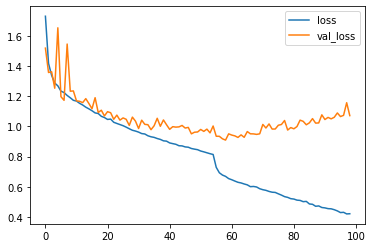

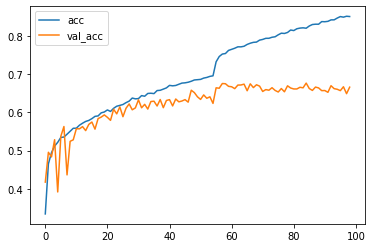

`'/tf/data/Quan/fer2013/backtobasics_cleaned_data/attention/vgg_resnet5_3_hist.hdf5'`

val acc: 0.6768092105263158  
val loss: 1.0113263255671452

test acc: 0.684   
test loss: 0.957

Observed minimal loss: 0.910

### SVGG 5_5

* Attention:
    * Apply Inception concept with ksizes=[1,3,5], out_channels = emb_dim, cat from x1, x2 and x3, no residual connection
    * x_out is normalized by emb_dim
    
* SVGG 5 blocks with additional outputs from x3 and x4

* Adam 0.005, L2=1e-4

`/tf/data/Quan/fer2013/backtobasics_cleaned_data/attention/vgg_resnet5_5`
    
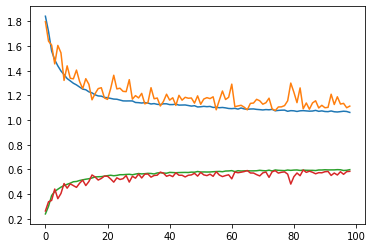

Decrease lr to 1e-4, train to 130 epochs

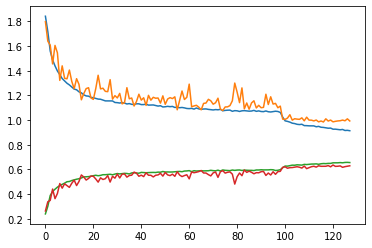

Decrease lr to 5e-5, train to 160 epochs

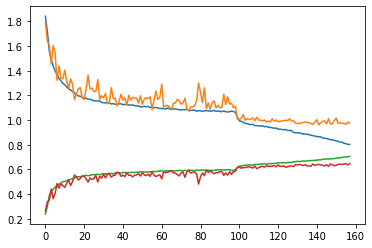

`'/tf/data/Quan/fer2013/backtobasics_cleaned_data/attention/vgg_resnet5_5_hist.hdf5'`

val acc: 0.647  
val loss: 0.975

Observed minimal val loss: 0.964

### SVGG 5_7 (*)

* Attention:
    * The same as above except out_channels = emb_dim // card, cat for x1, x2 and x3. ksizes = [1,3,5], add residual connection

* SVGG 5 blocks with additional outputs from x3 and x4

* Adam 0.001, L2=1e-4
    * Schedule lr, factor=0.5, patience=10
    
`/tf/data/Quan/fer2013/backtobasics_cleaned_data/attention/vgg_resnet5_7`

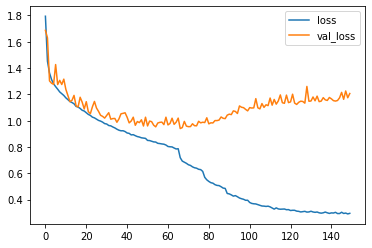

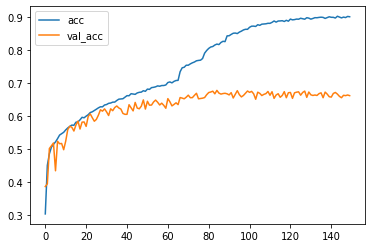

`/tf/data/Quan/fer2013/backtobasics_cleaned_data/attention/vgg_resnet5_7_hist.hdf5`

val acc: 0.6776315789473685  
val loss: 1.0008907945532548

Observed minimal val loss: 0.940

## Replace SVBlock by Residual Block

### Residual Resnet 5_1

* Attention
    * Apply ResNeXt concept with card: x1, x2, x3 apply with card=4, ksizes=[1,3,3,5], padding=same, output of each card block is emb_dim // card
    * QK is normalized by sqrt(HW) x sqrt(emb_dim)
    * Use sigmoid
    * (1 + QK) matmul x3, then normalized by emb_dim   
* SVGG 4 blocks


* Adam 0.001, L2=1e-4
* Schedule lr: factor=0.5, patience=10

`/tf/data/Quan/fer2013/backtobasics_cleaned_data/attention/residual_resnet5_1`

*Leak of training plots*

val acc: 0.626  
val loss: 1.023

### Residual Resnet 5_2 (*)

* Attention: the same as above except normalizing x_out by sqrt(HW) x sqrt(emb_dim)

* Adam 0.003, L2=1e-4
* Schedule lr, factor=0.5, patience=8

`/tf/data/Quan/fer2013/backtobasics_cleaned_data/attention/residual_resnet5_2`

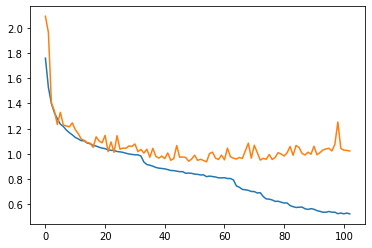

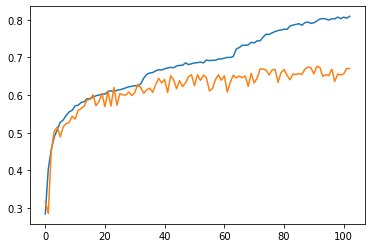

val acc: 0.6761853448275862  
val loss: 0.9936334100262872

The observed minimal val loss was: 0.938

### Residual Resnet 5_3

* Attention:
    * Apply auto-encoder concpet for x3 (aim to preserve the most important features)
    * Apply max pooling in encoder and up sampling bilinear in decoder
    * Residual x3 after auto-encoder
    * x1 and x2 still keep the Inception concept
    
* SVGG 4 Residual Blocks

* Adam 0.03, L2=1e-4
* Schedule lr, factor=0.5, patience=8

`/tf/data/Quan/fer2013/backtobasics_cleaned_data/attention/residual_resnet5_3`

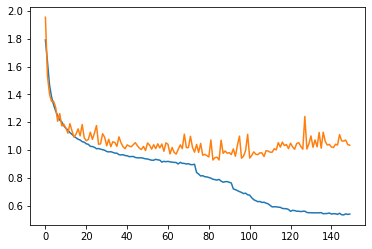

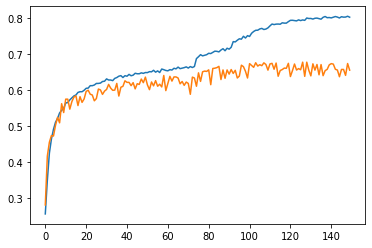

`/tf/data/Quan/fer2013/backtobasics_cleaned_data/attention/residual_resnet5_3_hist.pt`

val acc: 0.6769935344827587  
val loss: 1.0057090274218856

Observed minimal val loss: 0.928

### Residual Resnet 5_4

* Attention:
    * Fully apply auto-encoder and inception concept for x1, x2, x3 with MaxPooling. This time does not use Up sampling, the result size = input size // 2

* SVGG 4 Residual Blocks
    
* Adam 0.004, L2=1e-4
* Schedule lr, factor=0.5, patience=8

`/tf/data/Quan/fer2013/backtobasics_cleaned_data/attention/residual_resnet5_4`

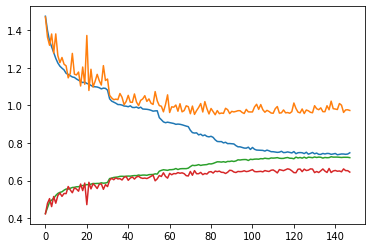

`/tf/data/Quan/fer2013/backtobasics_cleaned_data/attention/residual_resnet5_4_hist.hdf5`

val acc: 0.6641995614035088  
val loss: 0.9769616838087115

test acc: 0.655  
test loss: 0.980

Observed minimal val loss: 0.950

## Attention mechanism keeping original HW

### Residual Resnet 5_6

* Attention:
    * Remove Inception concept with single iconv (no BN or ReLU)
    * QK now keep the orignal HW with shape D x D x HW (without normalization)
    * Apply sigmoid for QK
    * (1+QK) * x3 -> sum(2)
    
* SVGG 4 Residual Blocks: 2, 2, 3, 3


* Adam 0.004, L2=1e-4
* Schedule lr, factor=0.5, patience=8

`/tf/data/Quan/fer2013/backtobasics_cleaned_data/attention/residual_resnet5_6`

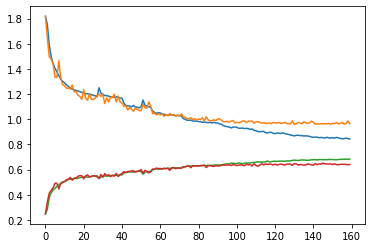

val acc: 0.650995575221239  
val loss: 0.9628010745597096

test acc: 0.652  
test loss: 0.936

Observed minimal val loss: 0.9587723470367162

### Residual Resnet 5_7

* Attention is the same
* SVGG 4 Residual Blocks. Apply SkippedVGG concept, connect among blocks with entirely MaxPooling

* Adam 0.004, L2=1e-4
* Schedule lr, factor=0.5, patience=8

`/tf/data/Quan/fer2013/backtobasics_cleaned_data/attention/residual_resnet5_7`

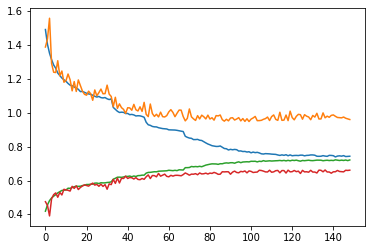

val acc: 0.6625548245614035  
val loss: 0.970671788642281

test acc: 0.66807  
test loss: 0.92744

Observed minimal val loss: 0.949

### Residual Resnet 5_8

* Attention is the same except integrating pooling into after iconv of x1, x2, x3
* SVGG 4 Residual Blocks: apply SkippedVGG concept
    * Each skipped connection is Conv2d ksize=2n, stride=2n + BN + ReLU + MaxPooling

* Adam 0.004, L2=1e-4
* Schedule lr, factor=0.5, patience=8

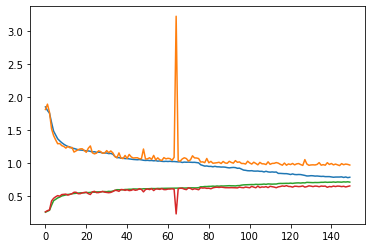

val acc: 0.6524122807017544  
val loss: 0.962773277048479

Observed minimal val loss: 0.957

**All results were taken from [Residual_cleaned_data](http://113.161.34.240:19012/notebooks/Quan/fer/v2_backtobasics/Residual_cleaned_data.ipynb#). The dataset is the denoised one**

### Compare with published papers

1. Residual Attention Network for Image Classification (CVPR-2017 Spotlight) By Fei Wang, Mengqing Jiang, Chen Qian, Shuo Yang, Chen Li, Honggang Zhang, Xiaogang Wang, Xiaoou Tang
    * Val acc: 0.6  

2. Minaee, Shervin, and Amirali Abdolrashidi. "Deep-emotion: Facial expression recognition using attentional convolutional network." arXiv preprint arXiv:1902.01019 (2019).
    * Val acc: 0.555  
    * Val loss: 1.217  

3. Wang, Xiaolong, et al. "Non-local neural networks." Proceedings of the IEEE conference on computer vision and pattern recognition. 2018.
    * Val acc: 0.633  
    * Val loss: 2.041  

**All results were taken from [git_exec](http://113.161.34.240:19012/tree/Quan/fer/residual_attention_net/git_exec.ipynb) and [non-local](http://113.161.34.240:19012/notebooks/Quan/fer/non-local.ipynb) notebooks**